<a href="https://colab.research.google.com/github/kalc1/CIT-99-Machine-Learning/blob/main/Week%203%20Regression_SimpleRandomSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 - Regression Model
In chapter 2 the housing.csv file was used to build a regression model.  We will examine the key concepts to data preprocessing, training the regression model, and evaluating it.  We will start with requesting access to libraries in Python.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from sklearn import *
import sklearn as sk
import matplotlib.pyplot as plt


# Import the housing.csv data file from Google Drive

Mount the Google Drive and navigate to the housing.csv file.  Right click and
select Copy path.  Within the parentheses paste the path of the  housing.csv file.  Run your code cell.

In [3]:
housingp = pd.read_csv("/content/drive/MyDrive/FCC/Machine Learning/Week 3 CIT 99/housing.csv")

# Taking a quick look at the housing data

In [4]:
# viewing the first 5 records of the data set
housingp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# get a list of all the columns and data types in the housing dataset.
housingp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Note all the data except ocen_proximity is real data (float)
let's look at the values in the ocean_proximity column


In [6]:
housingp["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Describe the numerical data
**count** - # of data points<br>
**mean** - average of column data points<br>
**std** - how spreadout each data point from the mean<br>
**min** - minimum column value<br>
**25%** - point where 25% of the data is below this value - Q1<br>
**50%** - point where 50% of the data is below this value - median<br>
**75%** - point where 75% of the data is below this value - Q3<br>
**max** - maximum column value


In [7]:
housingp.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


total_bedrooms is missing some values<br>
The maximum median_house_value is 500001.<br>
The maximum housing_median_age is 52.<br>
Remove the maximum values since they were capped.

In [8]:
housingp[(housingp["median_house_value"]<500000)&(housingp["housing_median_age"]<52)].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18555.000000,18555.000000,18555.000000,18555.000000,18362.000000,18555.000000,18555.000000,18555.000000,18555.000000
mean,-119.485306,35.594189,26.981299,2669.191215,547.969938,1470.684398,508.700781,3.693194,189323.228079
std,1.980966,2.147977,11.434147,2224.431894,429.491792,1163.197359,389.623630,1.570195,95372.017846
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.550000,33.920000,17.000000,1455.000000,300.000000,811.000000,284.000000,2.537250,115400.000000
50%,-118.450000,34.240000,27.000000,2142.000000,442.000000,1203.000000,416.000000,3.465900,171100.000000
75%,-117.970000,37.670000,36.000000,3184.000000,659.000000,1781.000000,614.000000,4.616100,243100.000000
max,-114.310000,41.950000,51.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,499100.000000


# Take a quick look at the distribution of the data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

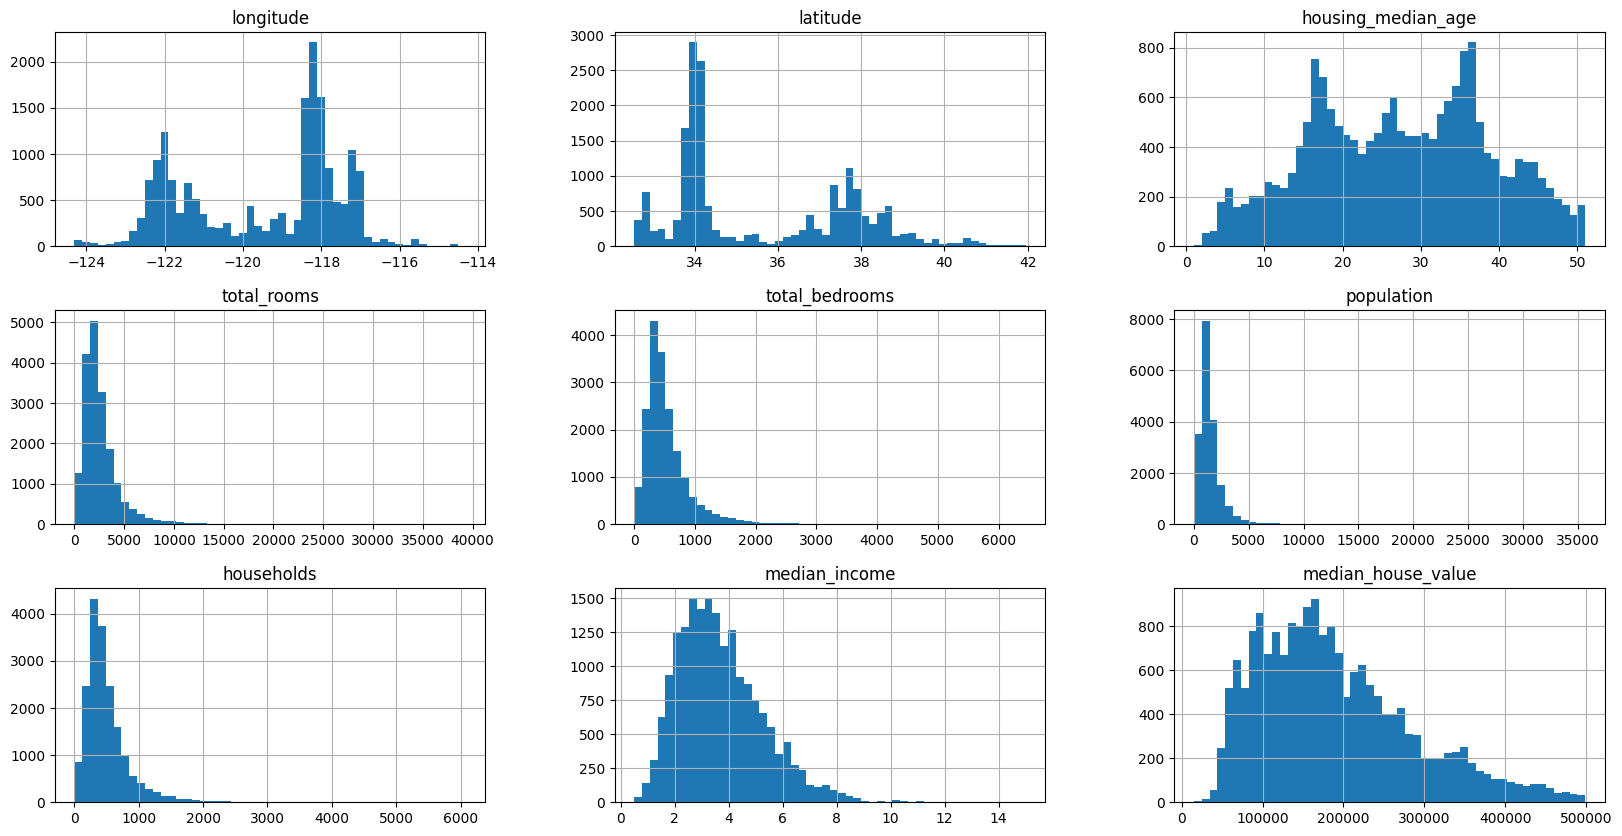

In [9]:
housingp[(housingp["median_house_value"]<500000)&(housingp["housing_median_age"]<52)].hist(bins=50, figsize=(20, 10))

**Multi-modal**: logitude, latitude, housing_median_age<br>
**right sckewed**: total_rooms, households, total_bedrooms, median_income, population, median_house_values


# Modified data set without caps

In [10]:
housing = housingp[(housingp["median_house_value"]<500000)&(housingp["housing_median_age"]<52)]


**multimodal (multiple peaks) for variables**: longitude, latitude, housing_median_age<br>
**skewed right for variables**: total_rooms, total_bedrooms, population, households, median_income, median_house_value


# Creating a Test Set
At this point we will create our test data set.  Before we start looking for patterns in our data set.  In this case, we will take a **Simple Random Random** from the entire data set.  The test and training set of data will be save to the Google Drive for future use.

In [11]:
# the random seed in this case is 42 random_state = 42
train_set, test_set = sk.model_selection.train_test_split(housing, test_size = 0.2, random_state=969)

# you can write the test data set to a csv file on your Google Drive
test_set.to_csv("/content/drive/MyDrive/FCC/Machine Learning/Week 3 CIT 99/testing.csv")

# you can write the training data set to a csv file on your Google Drive
train_set.to_csv("/content/drive/MyDrive/FCC/Machine Learning/Week 3 CIT 99/training.csv")


# Explore and Visualize the data to Gain insight

In [12]:
# copy the training data to the housing data frame
housing = train_set.copy()

## Plotting Geographical Data
The data set contains two columns longitude and latitude


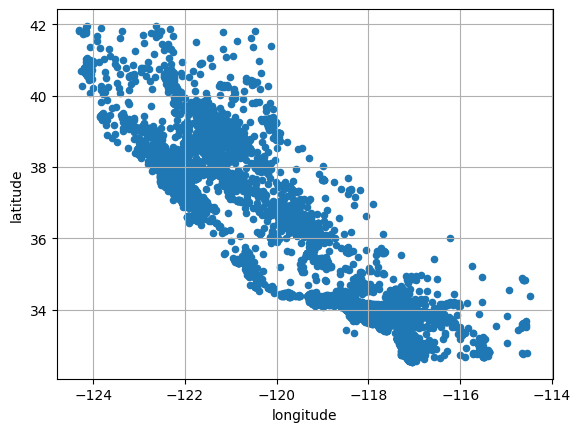

In [13]:
kk = 1
housing.plot(kind="scatter", x = "longitude", y="latitude",
             grid=True, alpha=kk)
plt.show()

# want to know more about alpha and color
# https://stackoverflow.com/questions/62516279/matplotlib-set-alpha-and-color-dynamically


## More control of color based on housing prices and population

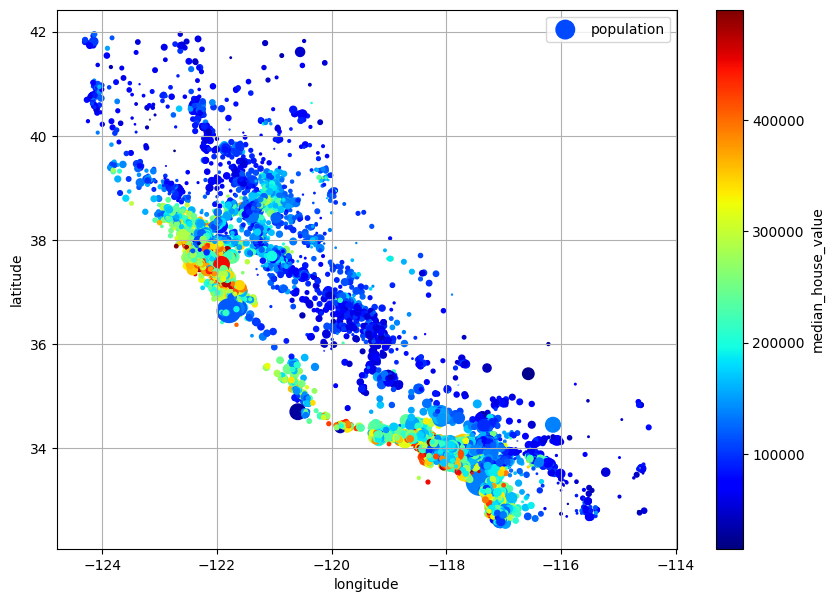

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

plt.show()

# Correlations
We need to determine if variables are correlated with median_house_value.  This is the variable you are trying to predict.  

In [15]:
corr_matrix = housing.corr()

# the corr_max is the correlation matrix measuring the correlation(linear
# relationship between every combination of two variables)

corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-15-bc74113b2107>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.669462
total_rooms           0.152985
households            0.096030
total_bedrooms        0.073788
population            0.017503
housing_median_age    0.009569
longitude            -0.020273
latitude             -0.172987
Name: median_house_value, dtype: float64

median_income is the highest correlated value followed by latitude and total_rooms.  The other values are  not highly correlated.

## Pandas scatter matrix Plot

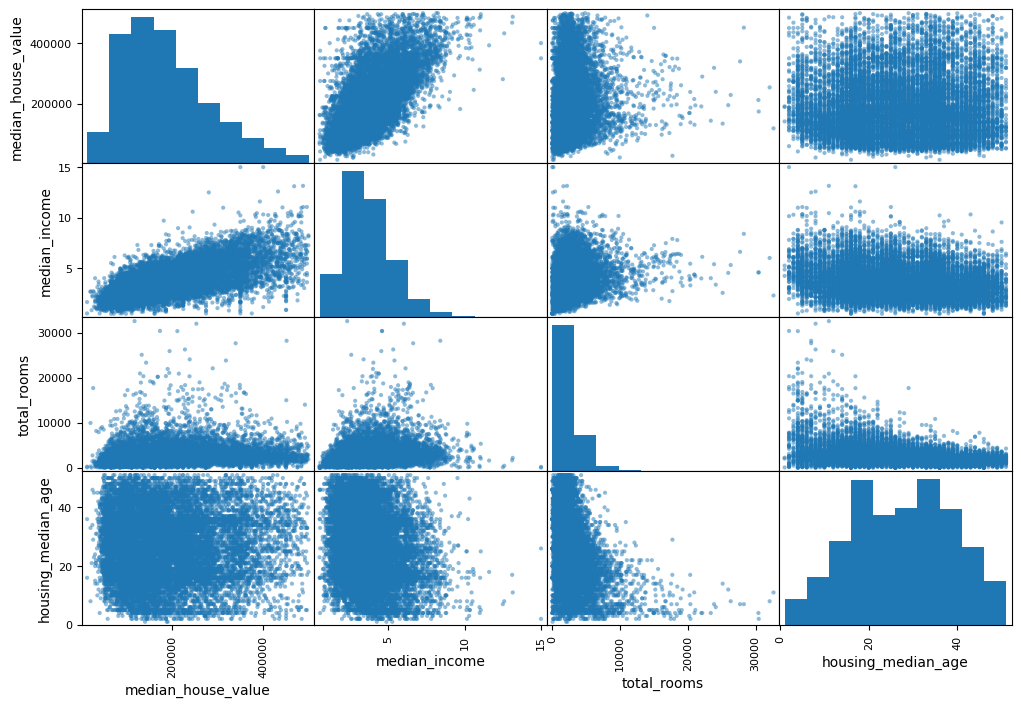

In [16]:
from pandas.plotting import scatter_matrix

# selecting the columns based on the highest correlation and seeing the graph of
# each
#

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

## look at ocean_proximity and the median_housing_value


In [17]:
pd.pivot_table(housing,index=["ocean_proximity"])

,households,housing_median_age,latitude,longitude,median_house_value,median_income,population,total_bedrooms,total_rooms
ocean_proximity,,,,,,,,,
<1H OCEAN,521.556139,28.338630,34.567730,-118.846972,223356.813072,4.021458,1554.523160,549.549150,2617.988458
INLAND,481.953713,23.536340,36.724282,-119.720630,122790.919441,3.196174,1406.109513,539.338825,2734.312586
ISLAND,252.000000,28.000000,33.390000,-118.400000,368750.000000,2.381050,583.000000,367.500000,1195.500000
NEAR BAY,510.648387,32.196774,37.809484,-122.219613,224288.467742,4.003897,1321.903226,534.515498,2631.516935
NEAR OCEAN,515.006472,28.037217,34.651791,-119.242379,226367.637540,3.678659,1397.033981,553.481987,2594.701187


## Creating new attribute from existing columns
Create new columns based on the columns that exist.
total_bedrooms and total_rooms do not give you much information but<br>

1.   rooms_per_house = total_rooms/households
2.   bedroom_ratio = total_bedrooms/total_rooms
3.   people_per-house = population/households


# Prepare the Data for Machine Learning Algorithms
Separate the data used to predict Median house values and the target column median_house_value.  

In [18]:
# add new columns
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"] = housing["population"]/housing["households"]

# create correlation matrix
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-18-4705124e7077>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.669462
total_rooms           0.152985
rooms_per_house       0.118517
households            0.096030
total_bedrooms        0.073788
population            0.017503
housing_median_age    0.009569
longitude            -0.020273
people_per_house     -0.046479
latitude             -0.172987
bedrooms_ratio       -0.239590
Name: median_house_value, dtype: float64

## Results of correlation
rooms_per_house, bedrooms_ratio have higher correlation coefficient values.

In [19]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
count,14844.000000,14844.000000,14844.000000,14844.000000,14690.000000,14844.000000,14844.000000,14844.000000,14844.000000,14844.000000,14690.000000,14844.000000
mean,-119.476845,35.586464,26.980733,2655.803961,545.258475,1464.529035,506.245621,3.694688,189434.357181,5.387678,0.213844,3.023012
std,1.979028,2.146915,11.455942,2166.748215,422.196248,1156.354015,382.222881,1.574376,95758.797282,2.311129,0.055398,5.059089
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.520000,33.920000,17.000000,1461.000000,301.000000,810.000000,284.000000,2.538275,115075.000000,4.429261,0.176900,2.470060
50%,-118.440000,34.230000,27.000000,2144.000000,442.000000,1206.000000,416.000000,3.469950,170800.000000,5.207324,0.203744,2.855039
75%,-117.970000,37.670000,36.000000,3175.000000,658.000000,1780.000000,614.000000,4.615100,243800.000000,5.993155,0.240228,3.320622
max,-114.470000,41.950000,51.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,499000.000000,132.533333,1.000000,599.714286


### Look at the distributions of the new columns rooms_per_house, people_per_house, bedrooms_ratio


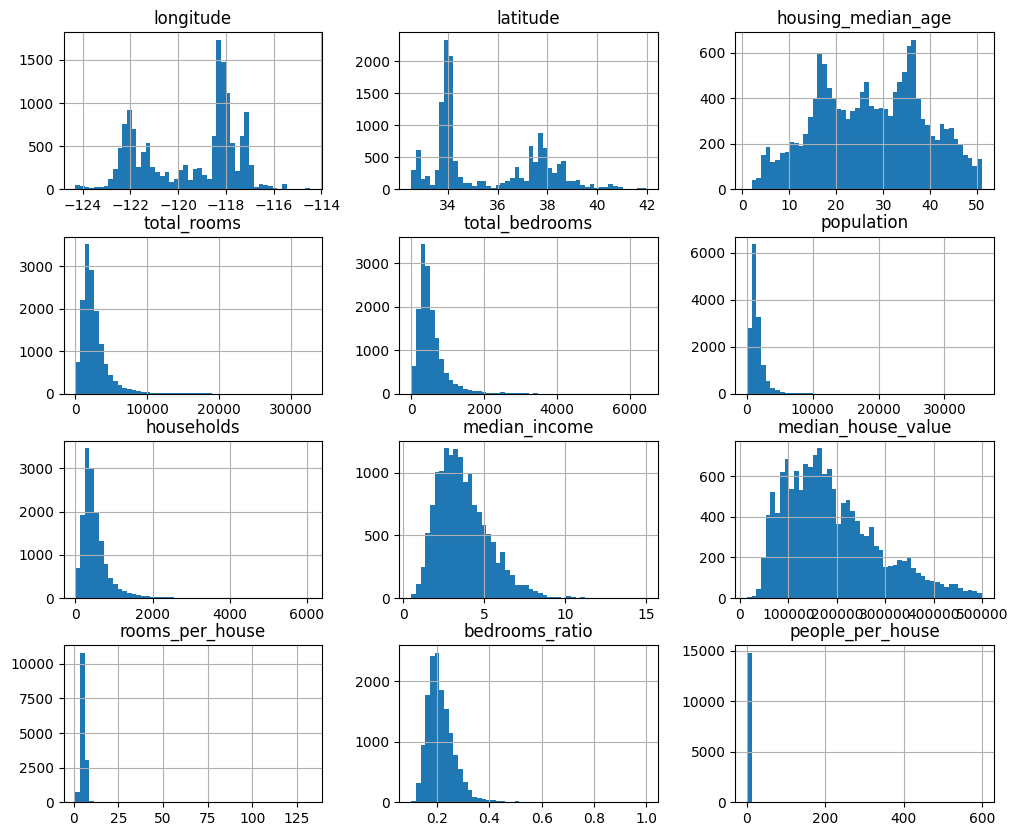

In [20]:
# transformations of variables to see if it changes the distribution towards
# a normal distribution

housing.hist(bins=50, figsize=(12,10))
plt.show()

# Prepare the Data for Machine Learning Algorithms
Separate the features columns from the target or label column


In [21]:
# copy median_house_value as the target column into a dataframe named
# housing_labels
housing_labels = housing["median_house_value"].copy()

# copy features into housing dataframe dropping the target column
housing = housing.drop("median_house_value", axis = 1)   # axis=1 means column

## Clean data from missing values
Use Scikit learn to fill missing values with median.  Because it will store the
median for all the numerical values from the training set and use them for the test, validation and new data sets when you preprocess the data.  Other libraries will not do that
## Scikit learn will store the median to use with test set

In [22]:
imputer = sk.impute.SimpleImputer(strategy = "median")

### Apply this missing value method to only numerical values.
save numeric columns in a new data frame


In [23]:
housing_num = housing.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house
19701,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,5.954023,0.174710,3.563218
661,-118.26,34.02,38.0,980.0,285.0,1308.0,310.0,1.5652,3.161290,0.290816,4.219355
12920,-117.98,33.64,20.0,1851.0,495.0,792.0,363.0,3.8187,5.099174,0.267423,2.181818
13689,-117.64,33.48,12.0,2007.0,397.0,1033.0,373.0,5.6754,5.380697,0.197808,2.769437
6713,-118.18,33.98,38.0,1477.0,374.0,1514.0,408.0,2.5703,3.620098,0.253216,3.710784
...,...,...,...,...,...,...,...,...,...,...,...
6171,-122.04,37.35,20.0,2016.0,313.0,767.0,310.0,6.8370,6.503226,0.155258,2.474194
12625,-118.07,34.09,33.0,2178.0,445.0,1153.0,400.0,3.6083,5.445000,0.204316,2.882500
5673,-118.04,33.72,14.0,4494.0,1048.0,2222.0,963.0,4.7821,4.666667,0.233200,2.307373
728,-118.10,33.93,35.0,1622.0,302.0,845.0,284.0,4.5769,5.711268,0.186190,2.975352


## Computing the median values for each numeric column

In [24]:
# replace missing values with the median value of each column
imputer.fit(housing_num)
imputer.statistics_   # the median for each numerical columns

array([-1.18440000e+02,  3.42300000e+01,  2.70000000e+01,  2.14400000e+03,
        4.42000000e+02,  1.20600000e+03,  4.16000000e+02,  3.46995000e+00,
        5.20732388e+00,  2.03744340e-01,  2.85503944e+00])

In [25]:
# compare it the median value computed in the DataFrame function
housing_num.median().values

array([-1.18440000e+02,  3.42300000e+01,  2.70000000e+01,  2.14400000e+03,
        4.42000000e+02,  1.20600000e+03,  4.16000000e+02,  3.46995000e+00,
        5.20732388e+00,  2.03744340e-01,  2.85503944e+00])

# Replace missing values with median

In [26]:
# set X as the set of features with median replacement for missing values
X = imputer.transform(housing_num)
X

array([[-119.63      ,   36.64      ,   33.        , ...,    5.95402299,
           0.17471042,    3.56321839],
       [-118.26      ,   34.02      ,   38.        , ...,    3.16129032,
           0.29081633,    4.21935484],
       [-117.98      ,   33.64      ,   20.        , ...,    5.09917355,
           0.26742301,    2.18181818],
       ...,
       [-118.04      ,   33.72      ,   14.        , ...,    4.66666667,
           0.23319982,    2.30737279],
       [-118.1       ,   33.93      ,   35.        , ...,    5.71126761,
           0.18618989,    2.97535211],
       [-118.24      ,   34.12      ,   41.        , ...,    4.04333333,
           0.24814509,    2.67      ]])

## Verify all columns have no missing values


In [27]:
# create a new dataframe with numerical values of housing data
housing_tr = pd.DataFrame(X, columns = housing_num.columns,
                          index = housing_num.index)
housing_tr.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house
count,14844.000000,14844.000000,14844.000000,14844.000000,14844.000000,14844.000000,14844.000000,14844.000000,14844.000000,14844.000000,14844.000000
mean,-119.476845,35.586464,26.980733,2655.803961,544.187214,1464.529035,506.245621,3.694688,5.387678,0.213739,3.023012
std,1.979028,2.146915,11.455942,2166.748215,420.130648,1156.354015,382.222881,1.574376,2.311129,0.055119,5.059089
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,0.846154,0.100000,0.692308
25%,-121.520000,33.920000,17.000000,1461.000000,302.000000,810.000000,284.000000,2.538275,4.429261,0.177287,2.470060
50%,-118.440000,34.230000,27.000000,2144.000000,442.000000,1206.000000,416.000000,3.469950,5.207324,0.203744,2.855039
75%,-117.970000,37.670000,36.000000,3175.000000,654.000000,1780.000000,614.000000,4.615100,5.993155,0.239719,3.320622
max,-114.470000,41.950000,51.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,132.533333,1.000000,599.714286


## Handling Text and Categorical Attributes

In [28]:
# put categorical values in a separate dataframe
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
19701,INLAND
661,<1H OCEAN
12920,NEAR OCEAN
13689,<1H OCEAN
6713,<1H OCEAN
...,...
6171,<1H OCEAN
12625,<1H OCEAN
5673,<1H OCEAN
728,<1H OCEAN


In [29]:
# Create one-hot encoding for categorical data
cat_encoder = sk.preprocessing.OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
cat_df1 = pd.DataFrame(housing_cat_1hot.toarray(), columns=cat_encoder.categories_, index=housing.index)
cat_df1

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19701,0.0,1.0,0.0,0.0,0.0
661,1.0,0.0,0.0,0.0,0.0
12920,0.0,0.0,0.0,0.0,1.0
13689,1.0,0.0,0.0,0.0,0.0
6713,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
6171,1.0,0.0,0.0,0.0,0.0
12625,1.0,0.0,0.0,0.0,0.0
5673,1.0,0.0,0.0,0.0,0.0
728,1.0,0.0,0.0,0.0,0.0


## Creating a Pipeline for the data
Machine Learning algorithms don't perform well when the input numerical attributes have very different scales.
Min-Max -

In [30]:
# combining all the data in one dataframe
housing_tr_d = pd.concat([housing_num, cat_df1], axis=1)
housing_tr_d
housingx = housing_tr_d.copy()



In [31]:
housingx

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
19701,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,5.954023,0.174710,3.563218,0.0,1.0,0.0,0.0,0.0
661,-118.26,34.02,38.0,980.0,285.0,1308.0,310.0,1.5652,3.161290,0.290816,4.219355,1.0,0.0,0.0,0.0,0.0
12920,-117.98,33.64,20.0,1851.0,495.0,792.0,363.0,3.8187,5.099174,0.267423,2.181818,0.0,0.0,0.0,0.0,1.0
13689,-117.64,33.48,12.0,2007.0,397.0,1033.0,373.0,5.6754,5.380697,0.197808,2.769437,1.0,0.0,0.0,0.0,0.0
6713,-118.18,33.98,38.0,1477.0,374.0,1514.0,408.0,2.5703,3.620098,0.253216,3.710784,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6171,-122.04,37.35,20.0,2016.0,313.0,767.0,310.0,6.8370,6.503226,0.155258,2.474194,1.0,0.0,0.0,0.0,0.0
12625,-118.07,34.09,33.0,2178.0,445.0,1153.0,400.0,3.6083,5.445000,0.204316,2.882500,1.0,0.0,0.0,0.0,0.0
5673,-118.04,33.72,14.0,4494.0,1048.0,2222.0,963.0,4.7821,4.666667,0.233200,2.307373,1.0,0.0,0.0,0.0,0.0
728,-118.10,33.93,35.0,1622.0,302.0,845.0,284.0,4.5769,5.711268,0.186190,2.975352,1.0,0.0,0.0,0.0,0.0


In [32]:
log_transformer = sk.preprocessing.FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])


In [33]:
rbf_transformer = sk.preprocessing.FunctionTransformer(sk.metrics.pairwise.rbf_kernel,
                                      kw_args=dict(Y=[[ 35.]], gamma=0.1))
age_simil_25_35 = rbf_transformer.transform(housing[["housing_median_age"]])

# Custom Transformers

In [34]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=969):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import *


num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", " households", "median_income"]

cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [36]:


def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = sk.pipeline.make_pipeline(
    sk.impute.SimpleImputer(strategy="median"),
    sk.preprocessing.FunctionTransformer(np.log, feature_names_out="one-to-one"),
    sk.preprocessing.StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=969)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [37]:
from sklearn.metrics.pairwise import rbf_kernel


housing_prepared =preprocessing.fit_transform(housing)
housing_prepared.shape


(14844, 27)

In [38]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age', 'remainder__rooms_per_house',
       'remainder__bedrooms_ratio', 'remainder__people_per_house'],
      dtype=object)

# Train and Evaluate the on the Training Set

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ab...
                                                   'households',
                                                   'median_income']),
                                                 ('geo', ClusterSimilarity(),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ab18bd7a0e0>)])),
                ('linearregression', LinearRegression())])

In [40]:
housing_predictions = lin_reg.predict(housing)
a_pred = housing_predictions[:5].round(-2)  #  -2 = rounded to the nearest hundredths
a_pred

array([ 96700., 105800., 279500., 238400., 162700.])

In [41]:
b_actual=housing_labels.iloc[:5].values
b_actual

array([110400., 123100., 137500., 275900., 178600.])

In [42]:
a_pred-b_actual

array([-13700., -17300., 142000., -37500., -15900.])

In [43]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

56852.04620369646

# Evaluate the test data

In [44]:
from sklearn.linear_model import LinearRegression
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("linear_regression", LinearRegression()),
])

full_pipeline.fit(X_test, y_test)
final_predictions = full_pipeline.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)


57997.76300233563
